# Quantization of Pytorch Models

## What is quantization
* Quantization describes methods for carrying out calculations and storing tensors at smaller bit width than floating point precision. The default size of floating point numbers are 32 bits.
* For instance, quantizing the deep learning model means, converting the 32-bit floating point numbers (of weights & activation outputs) to 8-bit integers.

## Types of quantization 
* Post Training Quantization (PTQ)
    1. Static
    2. Dynamic/Weight only
* Quantization Aware Training (QAT)
    1. Static
    
| Pros | Cons |
|---|---|
| Model gets smaller | Potential for little degradation in accuracy | 
| Reduced memory usage during inferencing | |
| Improves hardware accelerator latency | |
| Reduces inference latency | |
| Deployment on Edge AI devices with limited memory | |

## PyTorch Quantisation approach

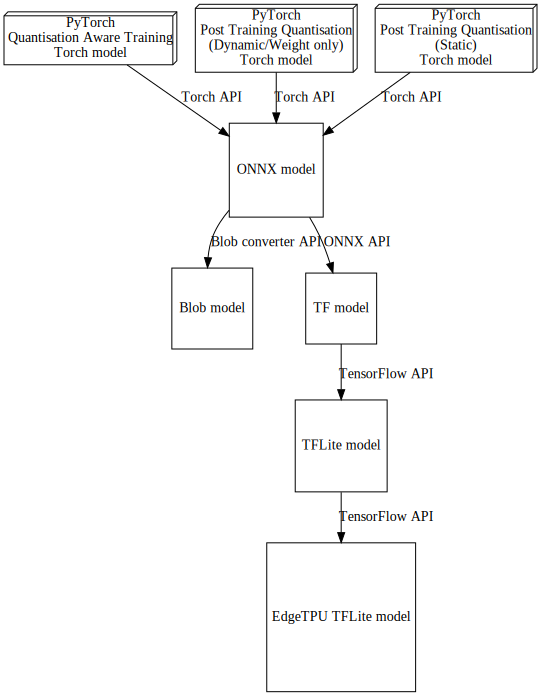

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import StringIO
from IPython.display import SVG
import pydot

dot_graph1 = pydot.Dot(graph_type='digraph')

sd_node = pydot.Node('PyTorch\nQuantisation Aware Training\nTorch model')
sd_node.set_shape('box3d')
dot_graph1.add_node(sd_node)

bsd_node = pydot.Node('PyTorch\nPost Training Quantisation\n(Dynamic/Weight only)\nTorch model')
bsd_node.set_shape('box3d')
dot_graph1.add_node(bsd_node)

csd_node = pydot.Node('PyTorch\nPost Training Quantisation\n(Static)\nTorch model')
csd_node.set_shape('box3d')
dot_graph1.add_node(csd_node)

riq_node = pydot.Node('ONNX model')
riq_node.set_shape('square')
dot_graph1.add_node(riq_node)

iedge = pydot.Edge(sd_node,riq_node)
iedge.set_label('Torch API')
dot_graph1.add_edge(iedge)

iedge = pydot.Edge(bsd_node,riq_node)
iedge.set_label('Torch API')
dot_graph1.add_edge(iedge)

iedge = pydot.Edge(csd_node,riq_node)
iedge.set_label('Torch API')
dot_graph1.add_edge(iedge)

asp_node = pydot.Node('Blob model')
asp_node.set_shape('square')
dot_graph1.add_node(asp_node)

iedge = pydot.Edge(riq_node, asp_node)
iedge.set_label('Blob converter API')
dot_graph1.add_edge(iedge)

asp_node1 = pydot.Node('TF model')
asp_node1.set_shape('square')
dot_graph1.add_node(asp_node1)

iedge = pydot.Edge(riq_node, asp_node1)
iedge.set_label('ONNX API')
dot_graph1.add_edge(iedge)

asp_node2 = pydot.Node('TFLite model')
asp_node2.set_shape('square')
dot_graph1.add_node(asp_node2)

iedge = pydot.Edge(asp_node1, asp_node2)
iedge.set_label('TensorFlow API')
dot_graph1.add_edge(iedge)

asp_node3 = pydot.Node('EdgeTPU TFLite model')
asp_node3.set_shape('square')
dot_graph1.add_node(asp_node3)

iedge = pydot.Edge(asp_node2, asp_node3)
iedge.set_label('TensorFlow API')
dot_graph1.add_edge(iedge)

dot_graph1.write_svg('big_data1.svg')
dot_graph1.write_ps2('big_data1.ps2')
SVG('big_data1.svg')

## ONNX Quantisation approach

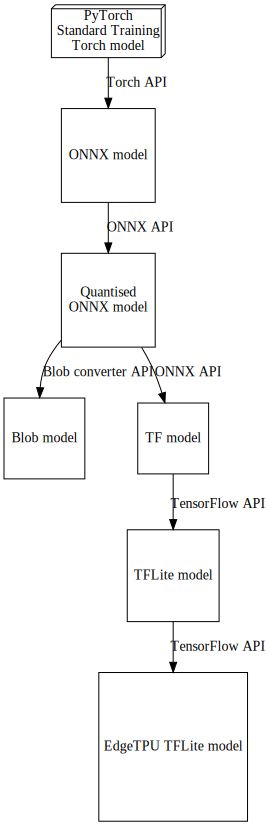

In [2]:
dot_graph = pydot.Dot(graph_type='digraph')

sd_node = pydot.Node('PyTorch\nStandard Training\nTorch model')
sd_node.set_shape('box3d')
dot_graph.add_node(sd_node)

riq_node = pydot.Node('ONNX model')
riq_node.set_shape('square')
dot_graph.add_node(riq_node)

iedge = pydot.Edge(sd_node,riq_node)
iedge.set_label('Torch API')
dot_graph.add_edge(iedge)

hadoop_node = pydot.Node('Quantised\nONNX model')
hadoop_node.set_shape('square')
dot_graph.add_node(hadoop_node)

iedge = pydot.Edge(riq_node,hadoop_node)
iedge.set_label('ONNX API')
dot_graph.add_edge(iedge)

asp_node = pydot.Node('Blob model')
asp_node.set_shape('square')
dot_graph.add_node(asp_node)

iedge = pydot.Edge(hadoop_node, asp_node)
iedge.set_label('Blob converter API')
dot_graph.add_edge(iedge)

asp_node1 = pydot.Node('TF model')
asp_node1.set_shape('square')
dot_graph.add_node(asp_node1)

iedge = pydot.Edge(hadoop_node, asp_node1)
iedge.set_label('ONNX API')
dot_graph.add_edge(iedge)

asp_node2 = pydot.Node('TFLite model')
asp_node2.set_shape('square')
dot_graph.add_node(asp_node2)

iedge = pydot.Edge(asp_node1, asp_node2)
iedge.set_label('TensorFlow API')
dot_graph.add_edge(iedge)

asp_node3 = pydot.Node('EdgeTPU TFLite model')
asp_node3.set_shape('square')
dot_graph.add_node(asp_node3)

iedge = pydot.Edge(asp_node2, asp_node3)
iedge.set_label('TensorFlow API')
dot_graph.add_edge(iedge)

dot_graph.write_svg('big_data.svg')
dot_graph.write_ps2('big_data.ps2')
SVG('big_data.svg')

## API
1. PyTorch Quantization (QAT)
    * https://pytorch.org/tutorials/advanced/static_quantization_tutorial.html
    * import torch
    * from torchvision.models import MobileNetV2
        * model = MobileNetV2()
    * Fuse relu & Conv2d
    * Insert Stubs to model 
        * model = nn.Sequential(torch.quantization.QuantStub(), model, torch.quantization.DeQuantStub())
    * Prepare model
        * m.train()
        * backend = "fbgemm"
        * model.qconfig = torch.quantization.get_default_qconfig(backend)
        * torch.quantization.prepare_qat(model, inplace=True)
    * Run standard training loop
    * Convert
        * m.eval()
        * model_quantized = torch.quantization.convert(model, inplace=True)
        * torch.save(model_quantized, model_file_path)


2. PyTorch -> ONNX
    * https://pytorch.org/docs/stable/onnx.html
    * import torch
    * torch.onnx.export(model, sample_input, onnx_model_path, opset_version=12, input_names=['input'], output_names=['output'])


3. ONNX Qunatization (Dynamic)
    * https://onnxruntime.ai/docs/performance/quantization.html
    * import onnx
    * from onnxruntime.quantization import quantize_dynamic, QuantType
    * quantized_model = quantize_dynamic(model_path, quantised_model_path)

    
4. ONNX -> Blob
    * https://docs.luxonis.com/en/latest/pages/tutorials/creating-custom-nn-models/
    * import blobconverter
    * onnx_model = onnx.load("./results/networks/test1.onnx")
model_simpified, check = simplify(onnx_model)
onnx.save(model_simpified, "./results/networks/test_sim1.onnx")
    * blobconverter.from_onnx(model=onnx_model_path, data_type="FP16", shaves=6, use_cache=False, output_dir=blob_model_path, optimizer_params=[])
    
    
5. ONNX -> TF
    * https://github.com/onnx/onnx-tensorflow/blob/main/example/onnx_to_tf.py
    * import onnx
    * from onnx_tf.backend import prepare
    * onnx_model = onnx.load(onnx_model_path)
    * tf_rep = prepare(onnx_model)
    * tf_rep.export_graph(tf_model_path)
    
    
6. TF -> TFLite
    * https://www.tensorflow.org/api_docs/python/tf/lite/TFLiteConverter
    * import tensorflow as tf
    * converter = tf.lite.TFLiteConverter.from_saved_model(tf_model_path)
    * tflite_model = converter.convert()
    * with open(tflite_model_path, 'wb') as f: f.write(tflite_model)
    
    
7. TFLite -> EdgeTPU TFLite
    * https://coral.ai/docs/edgetpu/compiler/
    * curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
    * echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
    * sudo apt-get update
    * sudo apt-get install edgetpu-compiler
    * edgetpu_compiler [options] tflite_model_path
    
8. PyTorch Quantization (PTQ - Dynamic/Weight only)
    * https://pytorch.org/blog/quantization-in-practice/
9. PyTorch Quantization (PTQ - Static)
    * https://pytorch.org/blog/quantization-in-practice/
    

    
    


In [3]:
!rm -rf /tmp/MobileNet*
!ls -lh /tmp/MobileNet*

ls: cannot access '/tmp/MobileNet*': No such file or directory


In [4]:
torch_model_path = "/tmp/MobileNetV2.pt"
torch_QAT_quant_path = "/tmp/MobileNetV2_TorchQATQuant.pt"
onnx_model_path = "/tmp/MobileNetV2.onnx"
onnx_quant_model_path = "/tmp/MobileNetV2_OnnxQuant.onnx"
onnx_sim_model_path = "/tmp/MobileNetV2_OnnxSim.onnx"
blob_model_path = "/tmp/MobileNetV2.blob"
tf_model_path = "/tmp/MobileNetV2.tf"
tflite_model_path = "/tmp/MobileNetV2.tflite"
edgetpu_tflite_model_path = "/tmp/MobileNetV2_edgetpu.tflite"
torch_PTQ_Weight_Eager_path = "/tmp/MobileNet_V2_Torch_PTQ_Quant_W_EG.pt"
torch_PTQ_Weight_FX_path = "/tmp/MobileNet_V2_Torch_PTQ_Quant_W_FX.pt"
torch_PTQ_Static_Eager_path = "/tmp/MobileNet_V2_Torch_PTQ_Quant_S_EG.pt"
torch_PTQ_Static_FX_path = "/tmp/MobileNet_V2_Torch_PTQ_Quant_S_FX.pt"

# PyTorch Model

In [5]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import MobileNetV2

In [6]:
model = MobileNetV2()

data_dir = os.path.abspath("./data")
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), transforms.RandomErasing()])
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_sub_len = int(len(trainset) * 0.001)
train_subset, val_subset = torch.utils.data.random_split(trainset, [train_sub_len, len(trainset) - train_sub_len])
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=4, shuffle=True, num_workers=2)

n_epochs = 3
opt = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    for images, labels in trainloader:
        opt.zero_grad()
        out = model(images)
        loss = loss_fn(out, labels)
        loss.backward()
        opt.step()

Files already downloaded and verified


In [7]:
torch.save(model, torch_model_path)
!ls -lh /tmp/MobileNet*

-rw-r--r-- 1 jovyan users 14M Feb 14 15:11 /tmp/MobileNetV2.pt


## 1. PyTorch Quantization (QAT)



In [8]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import MobileNetV2

data_dir = os.path.abspath("./data")
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), transforms.RandomErasing()])
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_sub_len = int(len(trainset) * 0.001)
train_subset, val_subset = torch.utils.data.random_split(trainset, [train_sub_len, len(trainset) - train_sub_len])
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=4, shuffle=True, num_workers=2)


model = MobileNetV2()

"""Fuse"""
# pair_of_modules_to_fuze = []
# for name, layer in model.named_modules():
#     if isinstance(layer, torch.nn.Linear):
#         pair_of_modules_to_fuze.append([name.split('.')[-1]])
#     elif isinstance(layer, torch.nn.ReLU) and len(pair_of_modules_to_fuze) > 0:
#         pair_of_modules_to_fuze[-1].append(name.split('.')[-1])
# pair_of_modules_to_fuze = list(filter(lambda x: len(x) == 2, pair_of_modules_to_fuze))
# torch.quantization.fuse_modules(model.modules(), pair_of_modules_to_fuze, inplace=True)


"""Insert stubs"""
model = torch.nn.Sequential(torch.quantization.QuantStub(), 
                  model, 
                  torch.quantization.DeQuantStub())


"""Prepare"""
model.train()
model.qconfig = torch.quantization.get_default_qconfig("fbgemm")
torch.quantization.prepare_qat(model, inplace=True)


"""Training Loop"""
n_epochs = 3
opt = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()


for epoch in range(n_epochs):
    for inputs, labels in trainloader:
        opt.zero_grad()
        out = model(inputs)
        loss = loss_fn(out, labels)
        loss.backward()
        opt.step()


"""Convert"""
model.eval()
model_quantized = torch.quantization.convert(model, inplace=True)
torch.save(model_quantized, torch_QAT_quant_path)

Files already downloaded and verified


/opt/conda/lib/python3.9/site-packages/torch/ao/quantization/observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


In [9]:
!ls -lh /tmp/MobileNet*

-rw-r--r-- 1 jovyan users  14M Feb 14 15:11 /tmp/MobileNetV2.pt
-rw-r--r-- 1 jovyan users 4.1M Feb 14 15:12 /tmp/MobileNetV2_TorchQATQuant.pt


# 2. PyTorch to ONNX

In [10]:
model = torch.load(torch_model_path)
torch.onnx.export(model,               
                  images,                         
                  onnx_model_path,   
                  export_params=True,             
                  do_constant_folding=True,  
                  input_names = ['input'],   
                  output_names = ['output'], 
                  dynamic_axes={'input' : {0 : 'batch_size'},   
                                'output' : {0 : 'batch_size'}})

!ls -lh /tmp/MobileNet*

-rw-r--r-- 1 jovyan users  14M Feb 14 15:12 /tmp/MobileNetV2.onnx
-rw-r--r-- 1 jovyan users  14M Feb 14 15:11 /tmp/MobileNetV2.pt
-rw-r--r-- 1 jovyan users 4.1M Feb 14 15:12 /tmp/MobileNetV2_TorchQATQuant.pt


# 3. ONNX Quantization (Dynamic)

In [11]:
!pip install onnx -q
!pip install onnxruntime -q
from onnxruntime.quantization import quantize_dynamic, QuantType

In [12]:
quantized_model = quantize_dynamic(onnx_model_path, onnx_quant_model_path)

## 4. ONNX to Blob

In [13]:
!pip install onnxsim -q

!pip install Flask==2.1.0 PyYAML==5.4.1 boto3==1.17.39 gunicorn==20.1.0 sentry-sdk -q
!pip install blobconverter -q

In [14]:
import onnx
from onnxsim import simplify
import blobconverter

In [15]:
model_simpified, check = simplify(onnx_model_path)
onnx.save(model_simpified, onnx_sim_model_path)

In [16]:
# blobconverter.from_onnx(
#     model=onnx_sim_model_path,
#     data_type="FP16",
#     shaves=6,
#     use_cache=False,
#     output_dir=blob_model_path,
#     optimizer_params=[])

!ls -lh /tmp/MobileNet*

-rw-r--r-- 1 jovyan users  14M Feb 14 15:12 /tmp/MobileNetV2.onnx
-rw-r--r-- 1 jovyan users 3.6M Feb 14 15:12 /tmp/MobileNetV2_OnnxQuant.onnx
-rw-r--r-- 1 jovyan users  14M Feb 14 15:12 /tmp/MobileNetV2_OnnxSim.onnx
-rw-r--r-- 1 jovyan users  14M Feb 14 15:11 /tmp/MobileNetV2.pt
-rw-r--r-- 1 jovyan users 4.1M Feb 14 15:12 /tmp/MobileNetV2_TorchQATQuant.pt


## 5. ONNX to TF

In [17]:
!pip install onnx-tf -q
!pip install tensorflow-probability

In [19]:
# from onnx_tf.backend import prepare
# import tensorflow_probability
# onnx_model = onnx.load(onnx_model_path)
# tf_rep = prepare(onnx_model)
# tf_rep.export_graph(tf_model_path)

In [ ]:
!ls -lh /tmp/MobileNet*

## 6. TF to TFLite

In [ ]:
import tensorflow as tf
import numpy as np

# def fake_dataset_generator(shape, n_iter):
#     def dataset():
#         for _ in range(n_iter):
#             data = np.random.randn(*shape)
#             data *= (1 / 255)
#             batch = np.expand_dims(data, axis=0)
#             yield [batch.astype(np.float32)]
#     return dataset
# datagen = fake_dataset_generator((192, 192, 3), 10)

converter = tf.lite.TFLiteConverter.from_saved_model(tf_model_path)
# converter.representative_dataset = datagen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.uint8
# converter.inference_output_type = tf.uint8
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open(tflite_model_path, 'wb') as f: 
    f.write(tflite_model)

In [ ]:
!ls -lh /tmp/MobileNet*

## 7. TFLite to EdgeTPU TFLite

In [ ]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
!sudo apt-get update
!sudo apt-get install edgetpu-compiler

In [ ]:
#https://github.com/google-coral/edgetpu/issues/453
!edgetpu_compiler "/tmp/MobileNetV2.tflite"

In [ ]:
!ls -lh /tmp/MobileNet*

## PyTorch Quantization (PTQ - Dynamic/Weight only)

https://pytorch.org/blog/quantization-in-practice/

In [ ]:
import torch
from torch import nn

model = MobileNetV2()
model.eval()

## EAGER MODE
from torch.quantization import quantize_dynamic
model_quantized = quantize_dynamic(model=model, qconfig_spec={nn.LSTM, nn.Linear}, dtype=torch.qint8, inplace=False)
torch.save(model_quantized, torch_PTQ_Weight_Eager_path)

## FX MODE
from torch.quantization import quantize_fx
qconfig_dict = {"": torch.quantization.default_dynamic_qconfig} 
example_inputs = iter(trainloader)
img, lab = next(example_inputs)
model_prepared = quantize_fx.prepare_fx(model, qconfig_dict, img)
model_quantized = quantize_fx.convert_fx(model_prepared)
torch.save(model_quantized, torch_PTQ_Weight_FX_path)

In [ ]:
!ls -lh /tmp/MobileNet*

## PyTorch Quantization (PTQ - Static)

https://pytorch.org/blog/quantization-in-practice/


In [21]:
import torch
from torch import nn
import copy

# model = MobileNetV2(pretrained=True)
model = torchvision.models.resnet18(pretrained=True)

## EAGER MODE
m = copy.deepcopy(model)
m.eval()

# torch.quantization.fuse_modules(m, ['0','1'], inplace=True) 
# torch.quantization.fuse_modules(m, ['2','3'], inplace=True) 

m = nn.Sequential(torch.quantization.QuantStub(), 
                  m, 
                  torch.quantization.DeQuantStub())

m.qconfig = torch.quantization.get_default_qconfig("fbgemm")
torch.quantization.prepare(m, inplace=True)

example_inputs = iter(trainloader)
img, lab = next(example_inputs)

with torch.inference_mode():
    for _ in range(10):
        m(img)
model_quantized = torch.quantization.convert(m, inplace=True)
torch.save(model_quantized, torch_PTQ_Static_Eager_path)


## FX MODE
from torch.quantization import quantize_fx
m = copy.deepcopy(model)
m.eval()
qconfig_dict = {"": torch.quantization.get_default_qconfig("fbgemm")}
model_prepared = quantize_fx.prepare_fx(m, qconfig_dict, img)

with torch.inference_mode():
    for _ in range(10):
        model_prepared(img)
model_quantized = quantize_fx.convert_fx(model_prepared)
torch.save(model_quantized, torch_PTQ_Static_FX_path)

/opt/conda/lib/python3.9/site-packages/torch/ao/quantization/fx/prepare.py:1530: UserWarning: Passing a QConfig dictionary to prepare is deprecated and will not be supported in a future version. Please pass in a QConfigMapping instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torch/ao/quantization/observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


In [22]:
!ls -lh /tmp/MobileNet*

-rw-r--r-- 1 jovyan users  14M Feb 14 15:12 /tmp/MobileNetV2.onnx
-rw-r--r-- 1 jovyan users 3.6M Feb 14 15:12 /tmp/MobileNetV2_OnnxQuant.onnx
-rw-r--r-- 1 jovyan users  14M Feb 14 15:12 /tmp/MobileNetV2_OnnxSim.onnx
-rw-r--r-- 1 jovyan users  14M Feb 14 15:11 /tmp/MobileNetV2.pt
-rw-r--r-- 1 jovyan users  12M Feb 14 15:13 /tmp/MobileNet_V2_Torch_PTQ_Quant_S_FX.pt
-rw-r--r-- 1 jovyan users 4.1M Feb 14 15:12 /tmp/MobileNetV2_TorchQATQuant.pt


https://pytorch.org/docs/stable/generated/torch.quantization.quantize_fx.prepare_fx.html

## Test - QAT IRIS

In [ ]:
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from torch.quantization import QuantStub, DeQuantStub

x, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.8)
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 3)
        self.softmax = nn.Softmax(dim=1)
        self.quant = QuantStub() 
        self.dequant = DeQuantStub() 

    def forward(self, X):
        X = self.quant(X)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        X = self.fc3(X)
        X = self.softmax(X)
        X = self.dequant(X)
        return X

m = Net()

m.train()
backend = "fbgemm"
m.qconfig = torch.quantization.get_default_qconfig(backend)
torch.quantization.prepare_qat(m, inplace=True)

n_epochs = 10
opt = torch.optim.SGD(m.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()


for epoch in range(n_epochs):
    opt.zero_grad()
    out = m(train_X)
    loss = loss_fn(out, train_y)
    loss.backward()
    opt.step()
    
m.eval()
model_quantized = torch.quantization.convert(m, inplace=True)
torch.save(model_quantized, '/tmp/Test_QAT_iris.pt')

## Test - Blob Converter

In [ ]:
class CatImgs(nn.Module):
    def forward(self, img1, img2, img3):
        return torch.cat((img1, img2, img3), 3)


X = torch.ones((1, 3, 300, 300), dtype=torch.float32)
torch.onnx.export(
    CatImgs(),
    (X, X, X),
    "/tmp/Test_Blob_Onnx.onnx",
    opset_version=12,
    do_constant_folding=True,
)

import onnx
from onnxsim import simplify

onnx_model = onnx.load("/tmp/Test_Blob_Onnx.onnx")
model_simpified, check = simplify(onnx_model)
onnx.save(model_simpified, "/tmp/Test_Blob_OnnxSim.onnx")

import blobconverter

blobconverter.from_onnx(
    model="/tmp/Test_Blob_OnnxSim.onnx",
    output_dir="/tmp/Test_Blob.blob",
    data_type="FP16",
    shaves=6,
    use_cache=False,
    optimizer_params=[]
)

In [ ]:
!ls -lh /tmp/MobileNet* & ls -lh /tmp/Test*

**TODO**
1. Fix Blob converter for MobileNet \
2. Fix Compile TFLite to EdgeTPU TFLite \